In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("Resources", "Decision_Tree.csv"))
df.head()

,Brand,Fabric,Bust,Height,Hip,Length,Size
0,Amazon,Silk,32.0,5.6,37.000000,just right,4
1,Macys,Cotton,34.0,5.6,36.000000,slightly short,4
2,Macys,Cotton,34.0,5.3,40.358501,just right,4
3,Nordstorm,Cotton,32.0,5.1,35.000000,slightly long,4
4,Amazon,Silk,32.0,5.6,32.000000,just right,4


In [3]:
df["Length"].value_counts()

just right        55793
slightly long     10552
slightly short     5622
very long          2288
very short          722
Name: Length, dtype: int64

In [4]:
df.Length = df.Length.replace({"just right": 1,
                               "slightly long": 2,
                               "slightly short": 3,
                               "very long":4,
                               "very short":5
                              })

In [5]:
df["Fabric"].value_counts()

Crepe     15089
Silk      14986
Nylon     14971
Denim     14969
Cotton    14962
Name: Fabric, dtype: int64

In [6]:
df.Fabric = df.Fabric.replace({"Crepe": 1,
                               "Silk": 2,
                               "Nylon": 3,
                               "Denim":4,
                               "Cotton":5
                              })

In [7]:
df["Brand"].value_counts()

Macys              18904
Banana Republic    18777
Nordstorm          18752
Amazon             18544
Name: Brand, dtype: int64

In [8]:
df.Brand = df.Brand.replace({"Macys": 1,
                               "Banana Republic": 2,
                               "Nordstorm": 3,
                               "Amazon":4
                              })

In [9]:
df.head()

,Brand,Fabric,Bust,Height,Hip,Length,Size
0,4,2,32.0,5.6,37.000000,1,4
1,1,5,34.0,5.6,36.000000,3,4
2,1,5,34.0,5.3,40.358501,1,4
3,3,5,32.0,5.1,35.000000,2,4
4,4,2,32.0,5.6,32.000000,1,4


In [10]:
df.to_csv("Resources/Decision_Tree_Final.csv", index=False, header=True)

In [11]:
target = df["Length"]
target_names = ["Just Right", "Slightly Long","Slightly Short","Very Long","Very Short"]

In [12]:
data = df.drop("Length", axis=1)
feature_names = data.columns
data.head()

,Brand,Fabric,Bust,Height,Hip,Size
0,4,2,32.0,5.6,37.000000,4
1,1,5,34.0,5.6,36.000000,4
2,1,5,34.0,5.3,40.358501,4
3,3,5,32.0,5.1,35.000000,4
4,4,2,32.0,5.6,32.000000,4


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 0.840/0.583
k: 3, Train/Test Score: 0.769/0.696
k: 5, Train/Test Score: 0.753/0.722
k: 7, Train/Test Score: 0.748/0.734
k: 9, Train/Test Score: 0.746/0.738
k: 11, Train/Test Score: 0.745/0.742
k: 13, Train/Test Score: 0.744/0.743
k: 15, Train/Test Score: 0.744/0.745
k: 17, Train/Test Score: 0.744/0.746
k: 19, Train/Test Score: 0.744/0.746


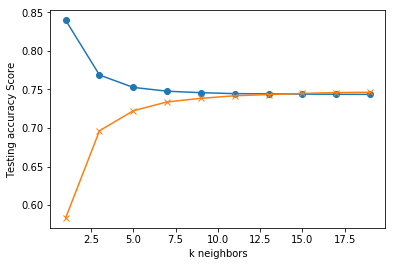

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('KNN.png')
plt.show()

k: 1, Train/Test Score: 0.840/0.583
k: 3, Train/Test Score: 0.769/0.696
k: 5, Train/Test Score: 0.753/0.722
k: 7, Train/Test Score: 0.748/0.734
k: 9, Train/Test Score: 0.746/0.738
k: 11, Train/Test Score: 0.745/0.742
k: 13, Train/Test Score: 0.744/0.743
k: 15, Train/Test Score: 0.744/0.745
k: 17, Train/Test Score: 0.744/0.746
k: 19, Train/Test Score: 0.744/0.746
        
k: 10 seems to be the best choice for this dataset
k=10 Test Acc: 0.741

In [19]:
# Note that k: 10 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('k=10 Test Acc: %.3f' % knn.score(X_test, y_test))

k=10 Test Acc: 0.741


In [20]:
knn_metrics = zip(train_scores,test_scores)


In [21]:
knn_metrics

In [18]:
train_scores

[0.8396998150519277,
 0.7686548584435908,
 0.752614169867691,
 0.7476881490965998,
 0.7457497510314411,
 0.7445226917057903,
 0.7442737231469626,
 0.7439714041826718,
 0.743669085218381,
 0.7435446009389671]

In [25]:
k_value = [1, 3, 5, 7, 9, 11, 13, 15]

In [26]:
knn_metrics = { "k": k_value,
               "Train Score" :train_scores,
                    "Test Sore": test_scores}

In [27]:
knn_metrics

{'k': [1, 3, 5, 7, 9, 11, 13, 15],
 'Train Score': [0.8396998150519277,
  0.7686548584435908,
  0.752614169867691,
  0.7476881490965998,
  0.7457497510314411,
  0.7445226917057903,
  0.7442737231469626,
  0.7439714041826718,
  0.743669085218381,
  0.7435446009389671],
 'Test Sore': [0.5833555614830621,
  0.6963456921845825,
  0.7223259535876234,
  0.7337956788476927,
  0.7384369165110696,
  0.7417978127500667,
  0.7432915444118432,
  0.7447852760736197,
  0.745905574819952,
  0.7462790077353961]}